In [2]:
import pandas as pd
import numpy as np
import psycopg2
import configparser
import matplotlib.pyplot as plt

In [43]:
#Establish connection
config = configparser.ConfigParser()
config.read('dwh.cfg')

conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
print(conn)

<connection object at 0x7ff8ed5483d8; dsn: 'user=dwhuser password=xxx dbname=dwh host=dwhcluster.c3ve82ipzxru.us-east-2.redshift.amazonaws.com port=5439', closed: 0>


In [44]:
sql = "select * from songs;"
df_songs = pd.read_sql_query(sql, conn)

In [45]:
df_songs.head()

,song_id,title,artist_id,year,duration
0,SOAACFC12A8C140567,Supernatural Pt. II,ARNHTE41187B99289A,0,343.09179
1,SOAAETA12A6D4FC626,Shine,ARQXK0B1187B9ACC97,2007,448.23465
2,SOAAKBE12A8C139075,Emília,ART1OPW1187FB3C5EF,0,159.71220
3,SOAAXUI12A6D4F9936,towards Osiris,ARTHSAE12131B4B70A,0,475.50649
4,SOAAZWW12A8AE460E9,Dream,AR7OWGF1187FB44CB8,2006,268.64281


In [46]:
sql = "select * from songplays;"
df_songplays = pd.read_sql_query(sql, conn)

In [47]:
df_songplays.columns

Index(['songplay_id', 'start_time', 'user_id', 'level', 'song_id', 'artist_id',
       'session_id', 'location', 'user_agent'],
      dtype='object')

In [23]:
df_songplays['level'].value_counts()

paid    271
free     62
Name: level, dtype: int64

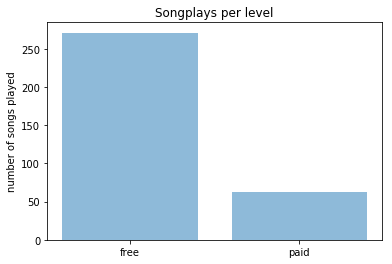

In [48]:
level = ('free', 'paid')
y_pos = np.arange(len(level))
level_count = df_songplays['level'].value_counts()

plt.bar(y_pos, level_count, align='center', alpha=0.5)
plt.xticks(y_pos, level)
plt.ylabel('number of songs played')
plt.title('Songplays per level')
plt.savefig("Songplays_per_level", bbox_inches='tight')
plt.show()


In [27]:
df_songplays.columns

Index(['songplay_id', 'start_time', 'user_id', 'level', 'song_id', 'artist_id',
       'session_id', 'location', 'user_agent'],
      dtype='object')

In [28]:
df_songs.columns

Index(['song_id', 'title', 'artist_id', 'year', 'duration'], dtype='object')

In [27]:
df_merged_songs = (df_songplays.merge(df_songs, left_on='song_id', right_on='song_id')
          .reindex(columns=['songplay_id', 'start_time', 'user_id', 'level', 'song_id', 'title', 'artist_id', 'location', 'year', 'duration']))
# print(df_merged_songs)
df_merged_songs.head()

,songplay_id,start_time,user_id,level,song_id,title,artist_id,location,year,duration
0,295,2018-11-02 17:31:45.796,10,free,SOHTKMO12AB01843B0,Catch You Baby (Steve Pitron & Max Sanna Radio...,NaN,"Washington-Arlington-Alexandria, DC-VA-MD-WV",0,181.21098
1,278,2018-11-03 17:59:01.796,15,paid,SOHTKMO12AB01843B0,Catch You Baby (Steve Pitron & Max Sanna Radio...,NaN,"Chicago-Naperville-Elgin, IL-IN-WI",0,181.21098
2,105,2018-11-07 00:43:00.796,97,paid,SOHTKMO12AB01843B0,Catch You Baby (Steve Pitron & Max Sanna Radio...,NaN,"Lansing-East Lansing, MI",0,181.21098
3,251,2018-11-20 15:50:01.796,100,free,SOHTKMO12AB01843B0,Catch You Baby (Steve Pitron & Max Sanna Radio...,NaN,"New York-Newark-Jersey City, NY-NJ-PA",0,181.21098
4,243,2018-11-14 12:56:28.796,62,free,SOHTKMO12AB01843B0,Catch You Baby (Steve Pitron & Max Sanna Radio...,NaN,"Houston-The Woodlands-Sugar Land, TX",0,181.21098


In [32]:
df_merged_songs.columns

Index(['songplay_id', 'start_time', 'user_id', 'level', 'song_id', 'title',
       'artist_id', 'location', 'year', 'duration'],
      dtype='object')

In [67]:
columns = [ 'level', 'title', 'location', 'year']
for X in columns:
    print('Values per {} column'.format(X))
    print(df_merged_songs[X].value_counts())
    print('-------------------------')

Values per level column
paid    271
free     62
Name: level, dtype: int64
-------------------------
Values per title column
You're The One                                             37
Catch You Baby (Steve Pitron & Max Sanna Radio Edit)        9
I CAN'T GET STARTED                                         9
Nothin' On You [feat. Bruno Mars] (Album Version)           8
Hey Daddy (Daddy's Home)                                    6
Up Up & Away                                                5
Make Her Say                                                5
Unwell (Album Version)                                      4
Supermassive Black Hole (Album Version)                     4
Mr. Jones                                                   4
Pienso En Ti                                                3
Fade To Black                                               3
Born To Be Wild                                             3
Let's Get It Started                                        3
From The

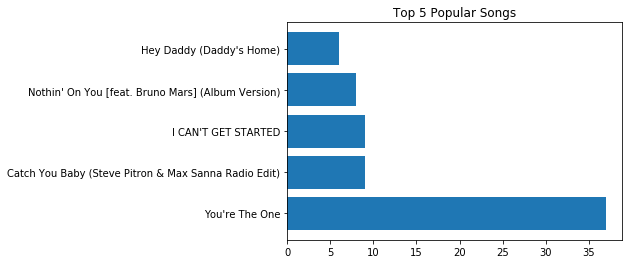

In [40]:
#based on df_merged_songs['title'].value_counts()
top_5_songs= {'You\'re The One' : 37,
'Catch You Baby (Steve Pitron & Max Sanna Radio Edit)': 9,
'I CAN\'T GET STARTED': 9,
'Nothin\' On You [feat. Bruno Mars] (Album Version)': 8,
'Hey Daddy (Daddy\'s Home)':6}

plt.barh(range(len(top_5_songs)), list(top_5_songs.values()), align='center')
plt.yticks(range(len(top_5_songs)), list(top_5_songs.keys()))
plt.title('Top 5 Popular Songs')
plt.savefig("Top_5_Popular_Songs", bbox_inches='tight')
plt.show()


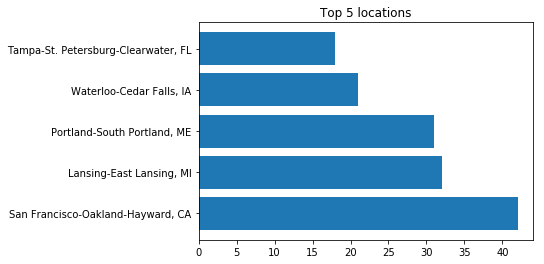

In [41]:
#based on df_merged_songs['location'].value_counts()
top_5_locations= {'San Francisco-Oakland-Hayward, CA': 42,
'Lansing-East Lansing, MI':32,
'Portland-South Portland, ME':31,
'Waterloo-Cedar Falls, IA':21,
'Tampa-St. Petersburg-Clearwater, FL':18}

# plt.bar(range(len(top_5_locations)), list(top_5_locations.values()), align='center')
# plt.xticks(range(len(top_5_locations)), list(top_5_locations.keys()), rotation=90)
plt.barh(range(len(top_5_locations)), list(top_5_locations.values()), align='center')
plt.yticks(range(len(top_5_locations)), list(top_5_locations.keys()))

plt.title('Top 5 locations')
plt.savefig("Top_5_locations", bbox_inches='tight')
plt.show()
